In [5]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

f = open("트럼프취임연설문.txt", 'r')
lines = f.readlines()[0]
f.close()

lines[0:100]

tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## 참고 한글 불용어 리스트
https://deep.chulgil.me/hangugeo-bulyongeo-riseuteu/

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
words =  lines.lower()
tokens = tokenizer.tokenize(words)
# 불용어 처리
# stop_words에 있거나
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
# 1글자는 제외
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
stopped_tokens2[:5]

['chief', 'justice', 'roberts', 'president', 'carter']

In [9]:
pd.Series(stopped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
nation       7
every        7
world        6
never        6
new          6
dtype: int64

In [12]:
from wordcloud import WordCloud
from collections import Counter

font_path = 'NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

count = Counter(stopped_tokens2)
# wordcloud 객체 생성
wordcloud = wordcloud.generate_from_frequencies(count)

In [13]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())
array = wordcloud.to_array()
array.shape

(800, 800, 3)

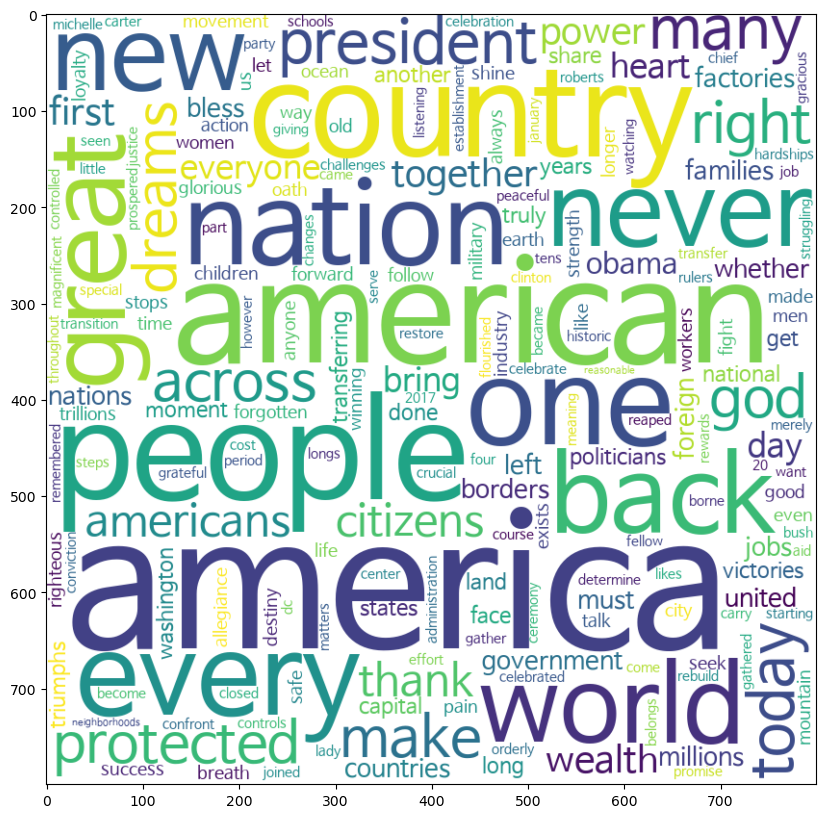

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()

In [15]:
fig.savefig('wordcloud.png')